In [ ]:
# Libraries
import matplotlib.pyplot as plt
%magic matplotlib online
import pandas as pd
from math import pi
 

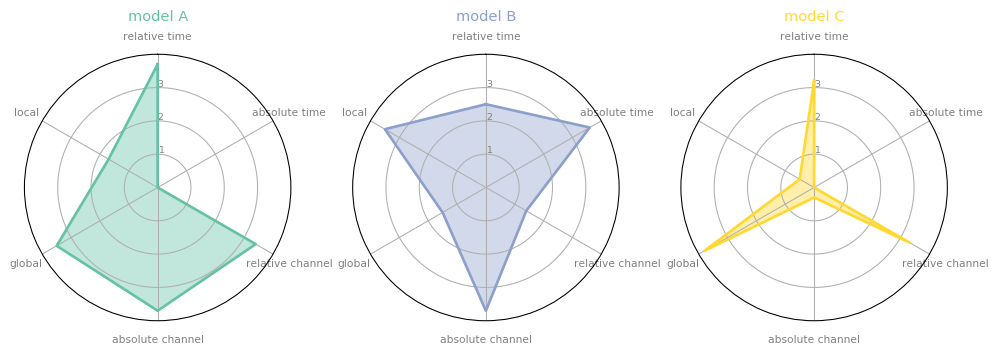

In [19]:
# Set data
df = pd.DataFrame({
'model': ['A','B','C','D'],
'relative time': [3.7, 2.5, 3.2, 3],
'absolute time': [0, 3.6, 0, 2.6],
'relative channel': [3.4, 1.4, 3.3, 2.3],
'absolute channel': [3.7, 3.7, 0.3, 3.2],
'global': [3.5, 1.5, 3.8, 3.2],
'local': [1.7, 3.5, 0.5, 2.3]
})
 
# ------- PART 1: Define a function that do a plot for one line of the dataset!
 
def make_spider(row, title, color):
 
    # number of variable
    categories=list(df)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(3,3,row+1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([1,2,3], ["1","2","3"], color="grey", size=7)
    plt.ylim(0,4)

    # Ind1
    values=df.loc[row].drop('model').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=11, color=color, y=1.1)
 
# ------- PART 2: Apply to all individuals
# initialize the figure
my_dpi=96
plt.figure(figsize=(1200/my_dpi, 1200/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df.index))
 
# Loop to plot
for row in range(0,3): #range(0, len(df.index)):
    make_spider(row=row, title='model '+df['model'][row], color=my_palette(row))